In [5]:
# Imports
import pandas as pd
import numpy as np
import math
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

# Submetric: Bridges Dataset
For the Final Project I decided to choose a dataset which focused on bridges.  In the case of a zombie apocalypse, having the most amount of brides conntected to a neighborhood would be beneficial for the residents since the destruction of those bridges would ultimately limit the amount of routes and entrances zombies would be able to enter from.

Using this dataset, I will be able to calculate the neighborhoods with the most and least amount of bridge connections in order to conclude which neighborhood would be best in a zombie apocalypse.

In [6]:
#Reading in csv file
bridges = pd.read_csv("Bridges_Dataset.csv")
#Make table 
bridges.head(5)

,id,name,start_neighborhood,end_neighborhood,year_built,year_rehab,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2002832442,Fort Duquesne Blvd,Central Business District,NaN,NaN,NaN,NaN,Central Business District,6,2.0,42003020100,6.0,2.0,2.0,1-3,40.446450,-79.996537
1,761156487,28th Street Bridge,Strip District,Polish Hill,1931.0,1974.0,https://tools.wprdc.org/images/pittsburgh/brid...,Strip District,7,6.0,42003060500,6.0,6.0,2.0,2-25,40.456182,-79.973714
2,290122944,Second Avenue Bridge,Squirrel Hill South,Swisshelm Park,1886.0,1970.0,NaN,Swisshelm Park,5,14.0,42003141400,3.0,14.0,4.0,2-12,40.415210,-79.915699
3,1811170969,Alexander Street Bridge,West End,NaN,1924.0,2000.0,https://tools.wprdc.org/images/pittsburgh/brid...,West End,2,20.0,42003562600,5.0,20.0,6.0,1-17,40.440063,-80.033353
4,2047190591,Millvale Trail Pedestrian Bridge,Troy Hill,NaN,NaN,NaN,NaN,Troy Hill,1,24.0,42003240600,1.0,24.0,1.0,1-1,40.466586,-79.977731


In the table above, I have a partial representation of the bridges dataset.

In [7]:
bridge_dict = dict()
# Creating dictionary of the neighborhoods and their number of bridges
for column in bridges:
    looping = bridges['neighborhood'].values

for value in looping: 
    if value not in bridge_dict:
            bridge_dict[value] = 1
    else:
        bridge_dict[value] = bridge_dict[value] + 1 

print(bridge_dict)

{'Central Business District': 12, 'Strip District': 1, 'Swisshelm Park': 2, 'West End': 4, 'Troy Hill': 7, 'Squirrel Hill South': 14, 'Brookline': 1, 'Overbrook': 6, 'Arlington': 2, 'Oakwood': 5, 'Bloomfield': 2, 'Greenfield': 2, 'Polish Hill': 3, 'Lower Lawrenceville': 2, 'Brighton Heights': 2, 'Hays': 6, 'Beechview': 1, 'Banksville': 1, 'Shadyside': 6, 'Central Oakland': 1, 'Sheraden': 3, 'East Allegheny': 4, 'Manchester': 1, 'Mount Washington': 4, 'Larimer': 3, 'East Liberty': 2, 'Summer Hill': 1, 'Bon Air': 3, 'Bluff': 2, 'South Oakland': 4, 'Hazelwood': 4, 'Point Breeze': 1, 'Squirrel Hill North': 2, nan: 4, 'Allentown': 1, 'South Side Flats': 5, 'Spring Hill-City View': 1, 'Allegheny Center': 3, 'Lincoln-Lemington-Belmar': 2, 'Perry South': 2, 'Northview Heights': 1, 'South Side Slopes': 5, 'Allegheny West': 2, 'Homewood South': 1, 'Highland Park': 2, 'California-Kirkbride': 1, 'Marshall-Shadeland': 2, 'South Shore': 1, 'Esplen': 1, 'Elliott': 1, 'Regent Square': 1, 'Windgap': 2,

In the above dictionary, I have each neighborhood listed along with how many bridges is connected to it.

In [8]:
#Make into series in ascending order
brid = pd.Series(bridge_dict).sort_values(ascending=False)
print(brid)

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Flats              5
South Side Slopes             5
NaN                           4
West End                      4
Hazelwood                     4
South Oakland                 4
Mount Washington              4
East Allegheny                4
Bon Air                       3
Larimer                       3
Allegheny Center              3
Sheraden                      3
Polish Hill                   3
Bloomfield                    2
Greenfield                    2
Perry South                   2
Lincoln-Lemington-Belmar      2
Swisshelm Park                2
Windgap                       2
Highland Park                 2
Arlington                     2
Squirrel Hill North           2
Allegheny West                2
Bluff                         2
Marshall

After creating the dictionary for Bridges, I then created a series and sorted it in ascending order in order to determine which neighborhoods do not need to be included in the graph.  

In [9]:
#Truncate series for better graph
top = brid.head(9)
print(top)

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Flats              5
South Side Slopes             5
dtype: int64


Using the series created previously, I truncated the data to only include the top 9 neighborhoods with the most amount of bridges connected to them.

Text(0, 0.5, 'Number of Bridges')

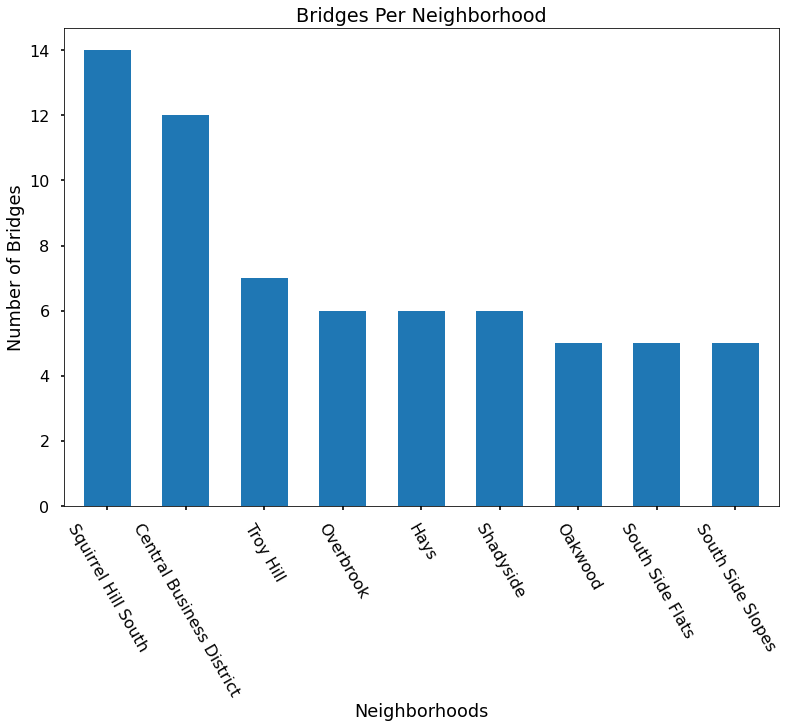

In [13]:
top.plot.bar(rot=-60, width=0.6)
plt.style.use('seaborn-poster')
plt.title('Bridges Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Bridges')

From the data, I was able to plot a bar graph and changed certain parameters, the style of the graph, and the titles the x-axis and y-axis.  Going further, I was able to make the graph more visually pleasing by rotating the x-axis titles and increasing the width of the bars.

Text(0, 0.5, 'Number of Bridges')

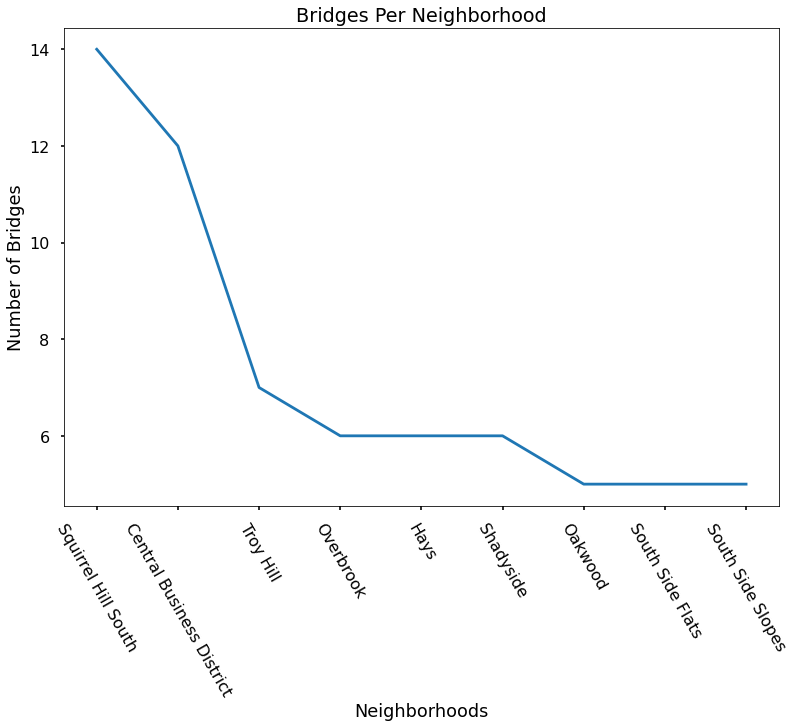

In [14]:
top.plot(rot=-60)
plt.style.use('seaborn-poster')
plt.title('Bridges Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Bridges')

To provide a second visual representation of the data, I chose to graph a plot graph more drastically in order to show the differernce in how many bridges there are in Squirrel Hill South and Central Business District compared to the other neighborhoods.

# Conclusion

In conclusion, the best neighborhood based on my bridges dataset alone would be Squirrel Hill South because there is a total of 14 bridges that are connected to the neighborhood.  In this case, Squirrel Hill South would be the best neighborhood in a Zombie Apocalypse because it would be the easiest to cut off the bridge access points to get into the neighborhood. 